In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from crypr.data import get_data
from crypr.util import common

from crypr.features.build_features import *

import pickle

p=print

In [2]:
SYM='ETH'
LAST_N_HOURS=16000
MOVING_AVERAGE_LAGS=[6,12,24,48,72]
TARGET='close'
Tx = 72
Ty = 1
TEST_SIZE=0.05

In [3]:
data = pd.read_csv('../data/raw/{}.csv'.format(SYM), index_col=0)

,open,high,close,low,volumeto,volumefrom,target,vt_ma6,vf_ma6,vt_ma12,vf_ma12,vt_ma24,vf_ma24,vt_ma48,vf_ma48,vt_ma72,vf_ma72
28073,9.90,9.90,9.88,9.85,8671.97,878.85,-0.202020,16733.726667,1708.086667,17225.871667,1753.154167,35481.107500,3605.300833,36592.273333,3725.588542,30618.140278,3133.586528
28074,9.88,9.93,9.86,9.83,13656.90,1380.94,-0.202429,16174.035000,1648.523333,16756.428333,1705.167500,34343.358333,3494.534167,36693.778750,3735.217083,30676.195000,3139.065139
28075,9.86,9.91,9.82,9.80,13966.55,1418.37,-0.405680,16183.805000,1647.285000,15971.322500,1625.116667,33017.424583,3363.822917,36555.602292,3719.737292,30743.924861,3145.510139
28076,9.82,9.84,9.81,9.78,25453.62,2600.26,-0.101833,18700.871667,1904.835000,17002.897500,1731.473333,30915.912083,3157.202500,36813.895000,3745.530417,30797.023056,3150.094861
28077,9.81,9.88,9.82,9.80,14617.67,1485.78,0.101937,16935.845000,1722.431667,16837.223333,1715.430000,28459.650000,2909.075833,36518.939792,3713.740000,30735.722639,3143.137500


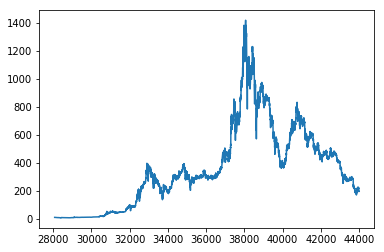

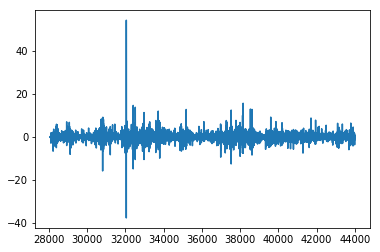

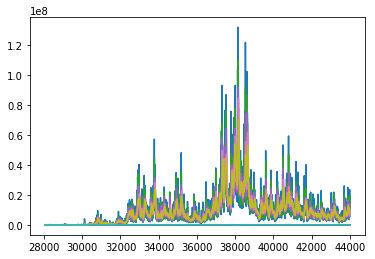

In [4]:
df = data[['open','high','close','low','volumeto', 'volumefrom']]\
    .pipe(truncate, LAST_N_HOURS)\
    .pipe(calc_target, TARGET)\
    .pipe(calc_volume_ma, MOVING_AVERAGE_LAGS)\
    .dropna(how='any', axis=0)
    
plt.figure(); plt.plot(df.close)
plt.figure(); plt.plot(df.target)
plt.figure(); plt.plot(df.filter(regex='v(t|f)'))
df.head()

In [5]:
N_FEATURES = len(df.columns)
N_FEATURES

17

In [6]:
X, y = data_to_supervised(df, Tx, Ty)

In [7]:
X_train, X_test, y_train, y_test = ttsplit_and_trim(X, y, TEST_SIZE, N_FEATURES, Ty)

p(X_train.shape)
p(X_test.shape)

(15064, 1224)
(793, 1224)


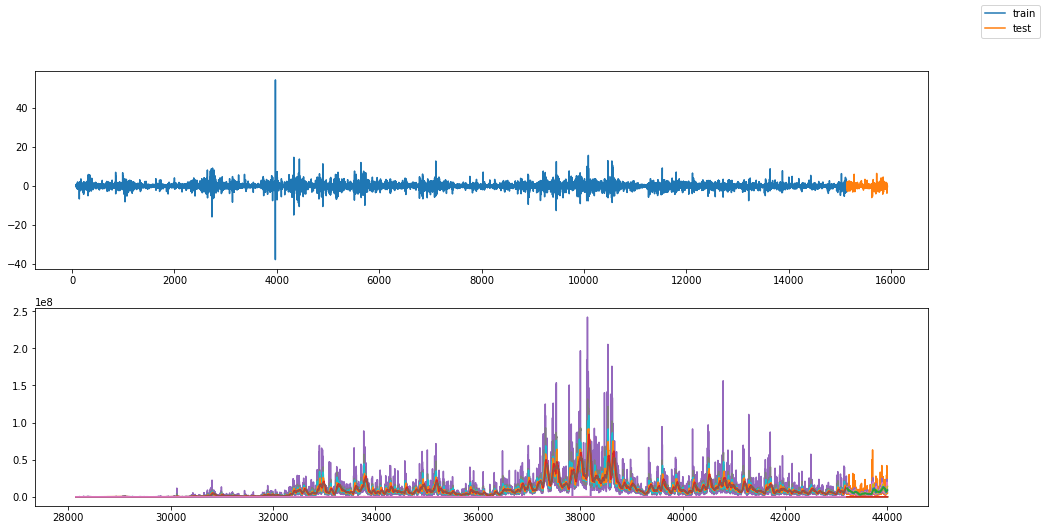

In [8]:
fig, ax = plt.subplots(2)
fig.set_size_inches(16,8)
ax[0].plot(y_train, label='train')
ax[0].plot(y_test, label='test')

ax[1].plot(X_train.iloc[:,-N_FEATURES:])
ax[1].plot(X_test.iloc[:,-N_FEATURES:])
fig.legend()

In [9]:
save_preprocessing_output(X_train, X_test, y_train, y_test, SYM, Tx, Ty, max(MOVING_AVERAGE_LAGS))